<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  üìå  Tr·ª±c Quan H√≥a D·ªØ Li·ªáu - 21_21 üìå
  
   Lab 1
</div>

# 4 Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("data/US_Accidents_processed.csv")
time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    df[col]=pd.to_datetime(df[col], format='mixed')

## 4.1 X·ª≠ l√≠ Outlier b·∫±ng IQR

In [3]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

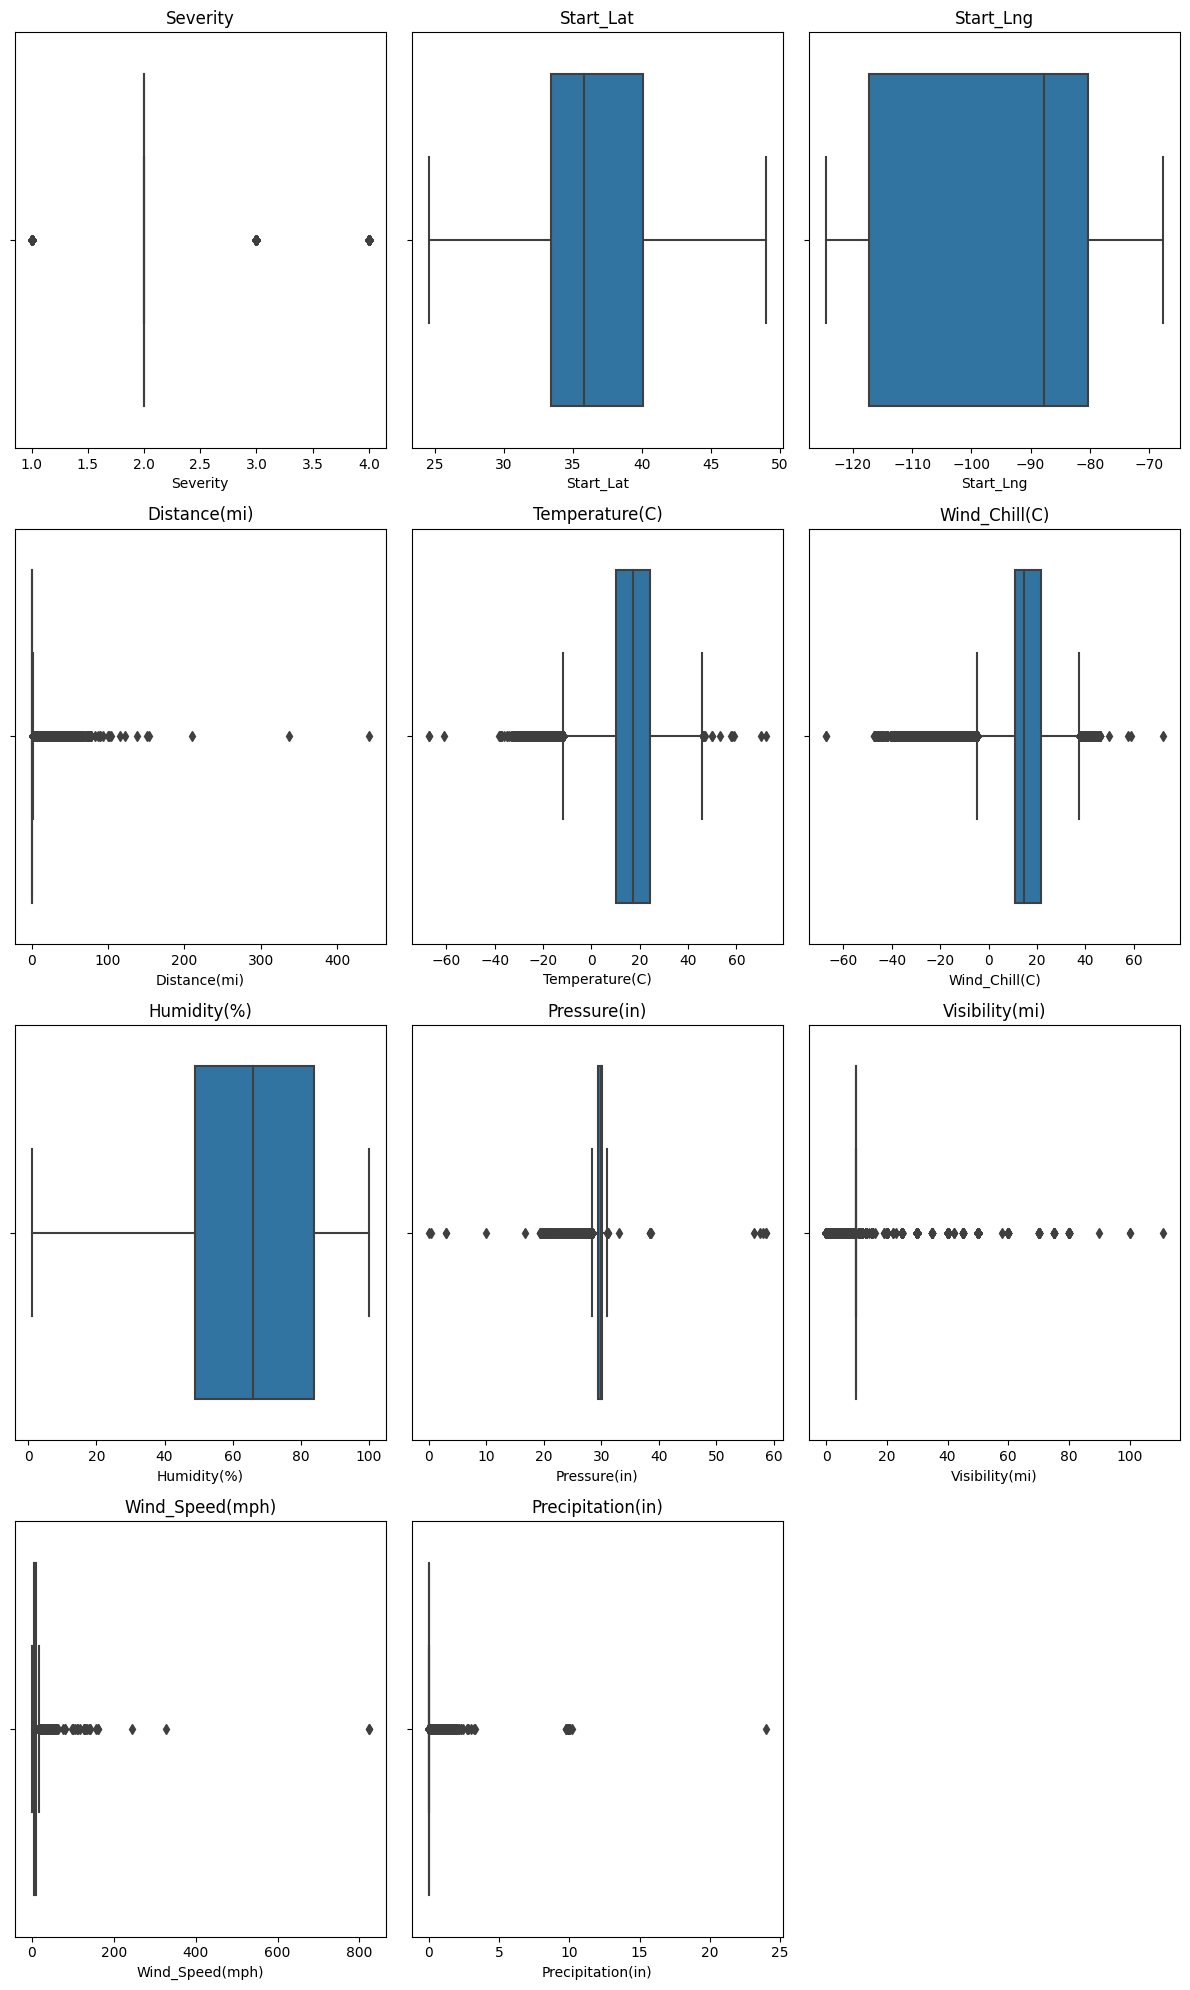

In [4]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# T·∫°o figure v√† axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# L·∫∑p qua c√°c c·ªôt s·ªë ƒë·ªÉ v·∫Ω boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # L∆∞u t√™n c·ªôt
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# X√≥a c√°c axes d∆∞ th·ª´a n·∫øu c√≥
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

- C·ªôt `Severity` th·ªÉ hi·ªán m·ª©c ƒë·ªô nghi√™m tr·ªçng, c√≥ gi√° tr·ªã t·ª´ 1 - 4 n√™n ch√∫ng ta kh√¥ng c·∫ßn x·ª≠ l√≠ outlier. 
- C√°c c·ªôt c√≤n l·∫°i x·ª≠ l√≠ outlier b·∫±ng IQR.

In [5]:

col_with_outliers = [col for col in numerical_cols if col != 'Severity']

def handle_outlier(col_to_handle: list, df):
    for col in col_to_handle:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        

        IQR = Q3 - Q1
        
        # t√≠nh kho·∫£ng 1.5 IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with values based on IQR
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df


df = handle_outlier(col_with_outliers, df)

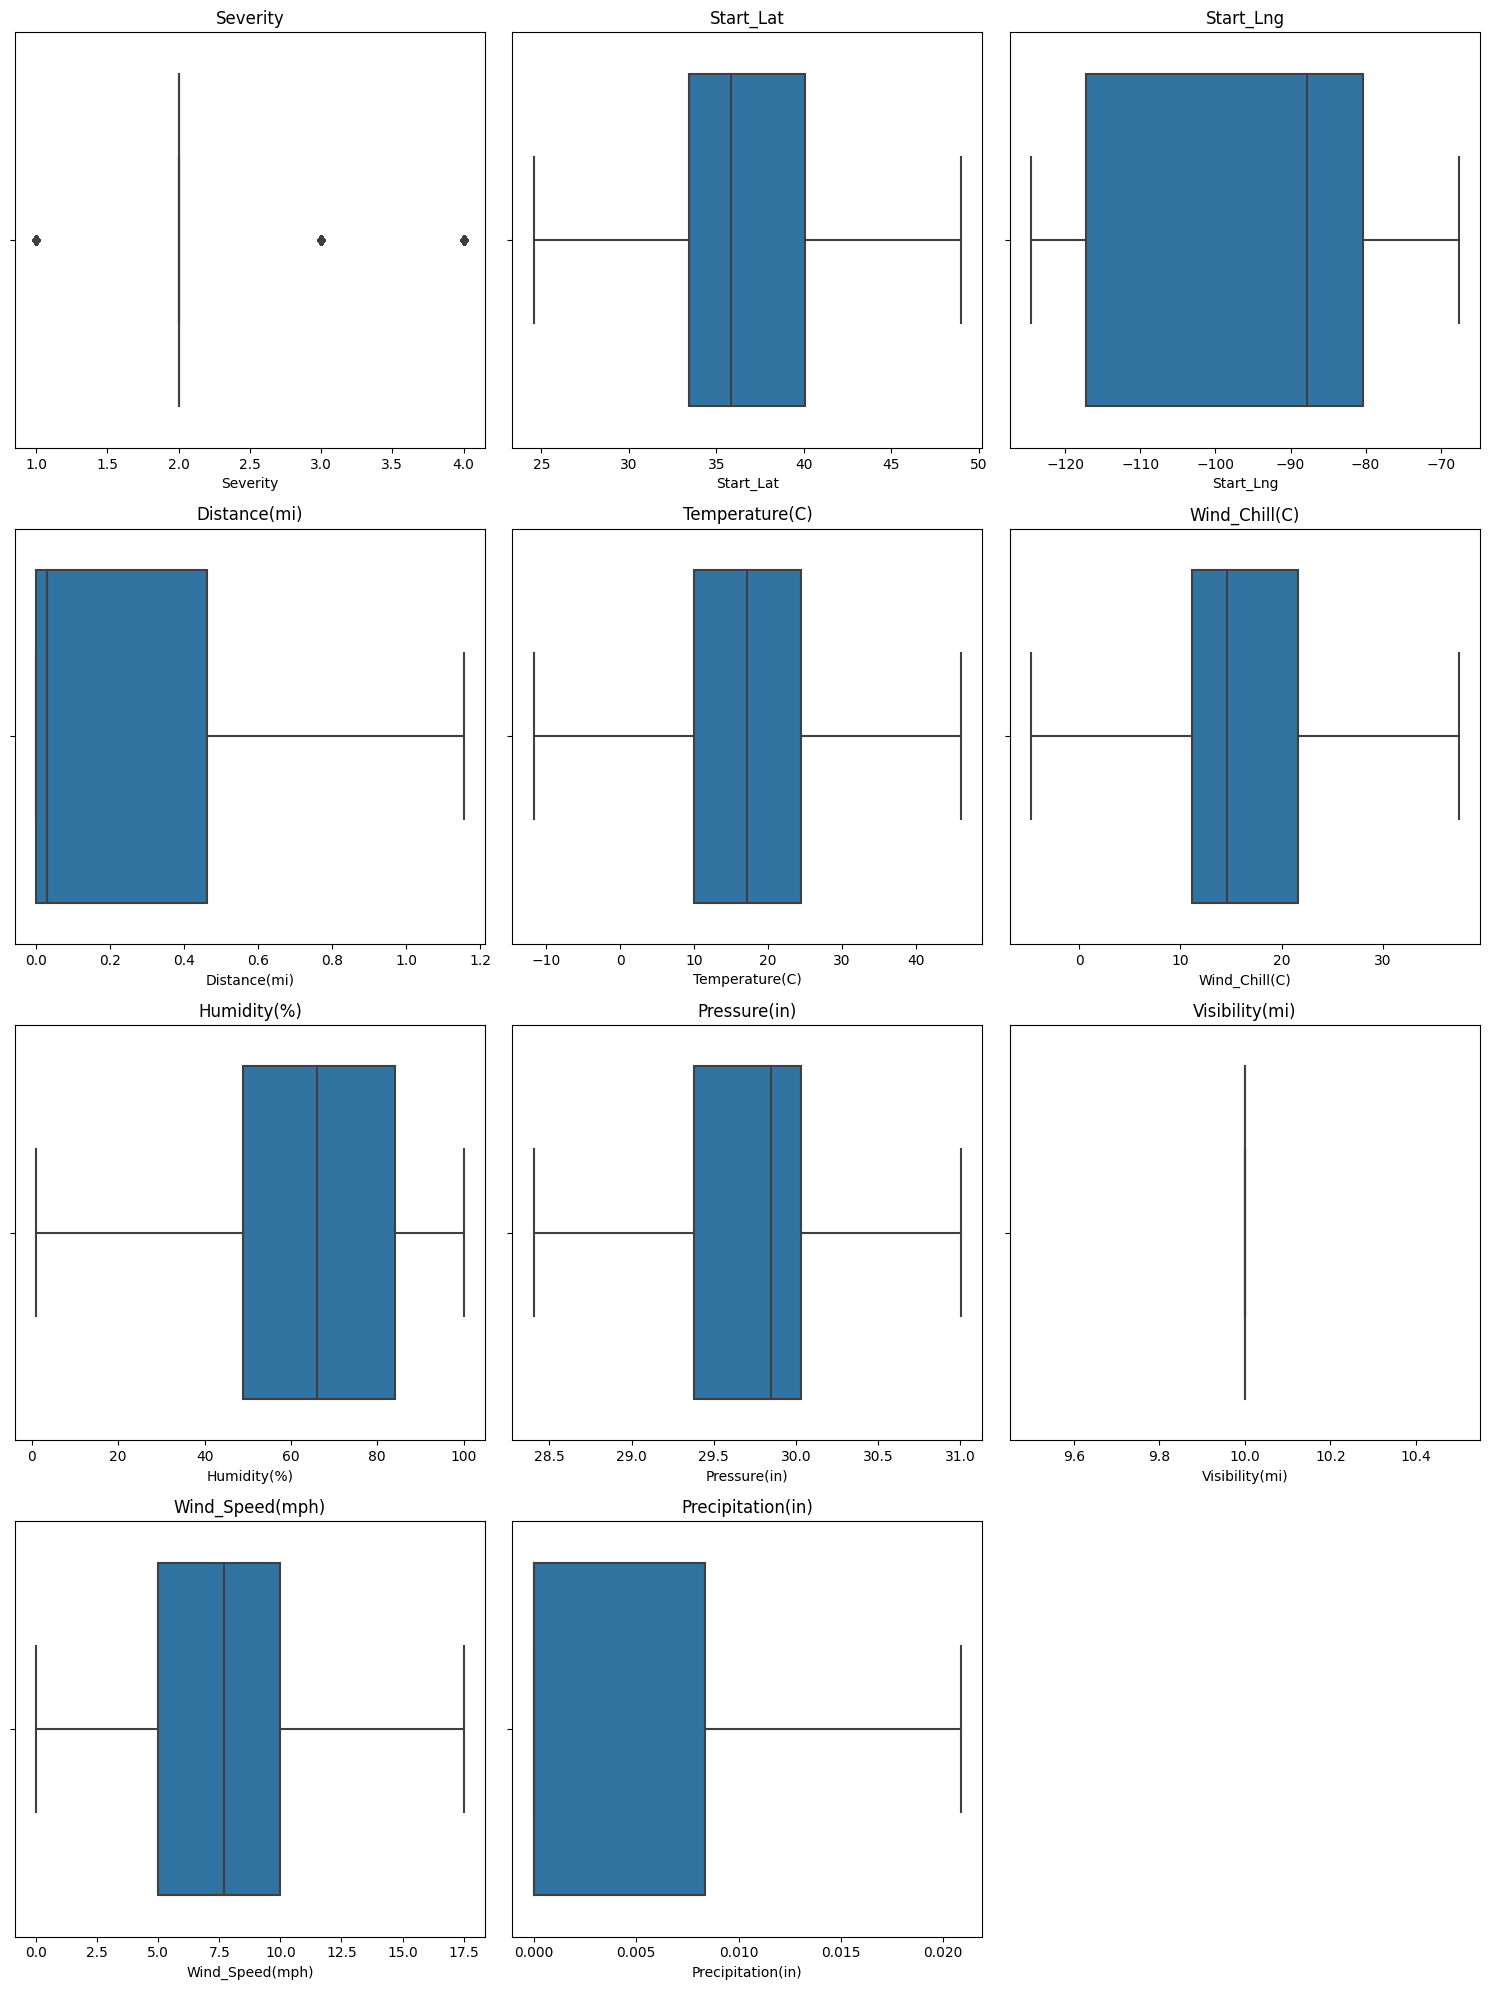

In [6]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# T·∫°o figure v√† axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# L·∫∑p qua c√°c c·ªôt s·ªë ƒë·ªÉ v·∫Ω boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # L∆∞u t√™n c·ªôt
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# X√≥a c√°c axes d∆∞ th·ª´a n·∫øu c√≥
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## 4.2 X·ª≠ l√≠ Categorical Columns